In [6]:
from utils.setup_grid import setup_grid
import matplotlib.pyplot as plt
import numpy as np

In [10]:
    g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, paths, params, param_str = setup_grid(num_actions=16)


Grid Setup Complete !


In [15]:
g.set_state(g.start_state)
print(g.x, g.y)
g.set_state(g.endpos)
print(g.x, g.y)
g.set_state((79, 49))
print(g.x, g.y)
g.endpos
g.actions[0][0]
g.set_state((40, 58))
print(g.x, g.y)

49.5 20.5
50.5 79.5
49.5 20.5
58.5 59.5


In [7]:
def plot_input_trajectory(paths, idx_list, g, X, Y, vStream_x, vStream_y,
                                                fname='GivenTrajectories'):
    # time calculation and state trajectory
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    # set grid
    minor_xticks = np.arange(g.xs[0] - 0.5 * g.dj, g.xs[-1] + 2 * g.dj, g.dj)
    minor_yticks = np.arange(g.ys[0] - 0.5 * g.di, g.ys[-1] + 2 * g.di, g.di)

    major_xticks = np.arange(g.xs[0], g.xs[-1] + 2 * g.dj, 5 * g.dj)
    major_yticks = np.arange(g.ys[0], g.ys[-1] + 2 * g.di, 5 * g.di)

    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(minor_yticks, minor=True)
    ax.set_xticks(major_xticks)
    ax.set_yticks(major_yticks)

    ax.set_xlim([15,85])
    ax.set_ylim([15,85])
    ax.grid(which='major', color='#CCCCCC', linestyle='', zorder = -1)
    ax.grid(which='minor', color='#CCCCCC', linestyle='--', zorder = -1)
    st_point= g.start_state
    plt.scatter(g.xs[st_point[1]], g.ys[g.ni - 1 - st_point[0]], c='g', s =300, zorder = 100)
    plt.scatter(g.xs[g.endpos[1]], g.ys[g.ni - 1 - g.endpos[0]], c='r', s = 300, zorder =100)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.quiver(X, Y, vStream_x[1, :, :], vStream_y[1, :, :])

    for idx in idx_list:
        trajectory = paths[0, idx]
    #     plt.plot(trajectory[0:-5,0], trajectory[0:-5,1], linewidth = 1, zorder= 99)
        plt.plot(trajectory[:,0], trajectory[:,1], linewidth = 1, zorder= 99)

    # plt.show()
    if fname != None:
         plt.savefig(fname+str(idx), dpi=300)

    return

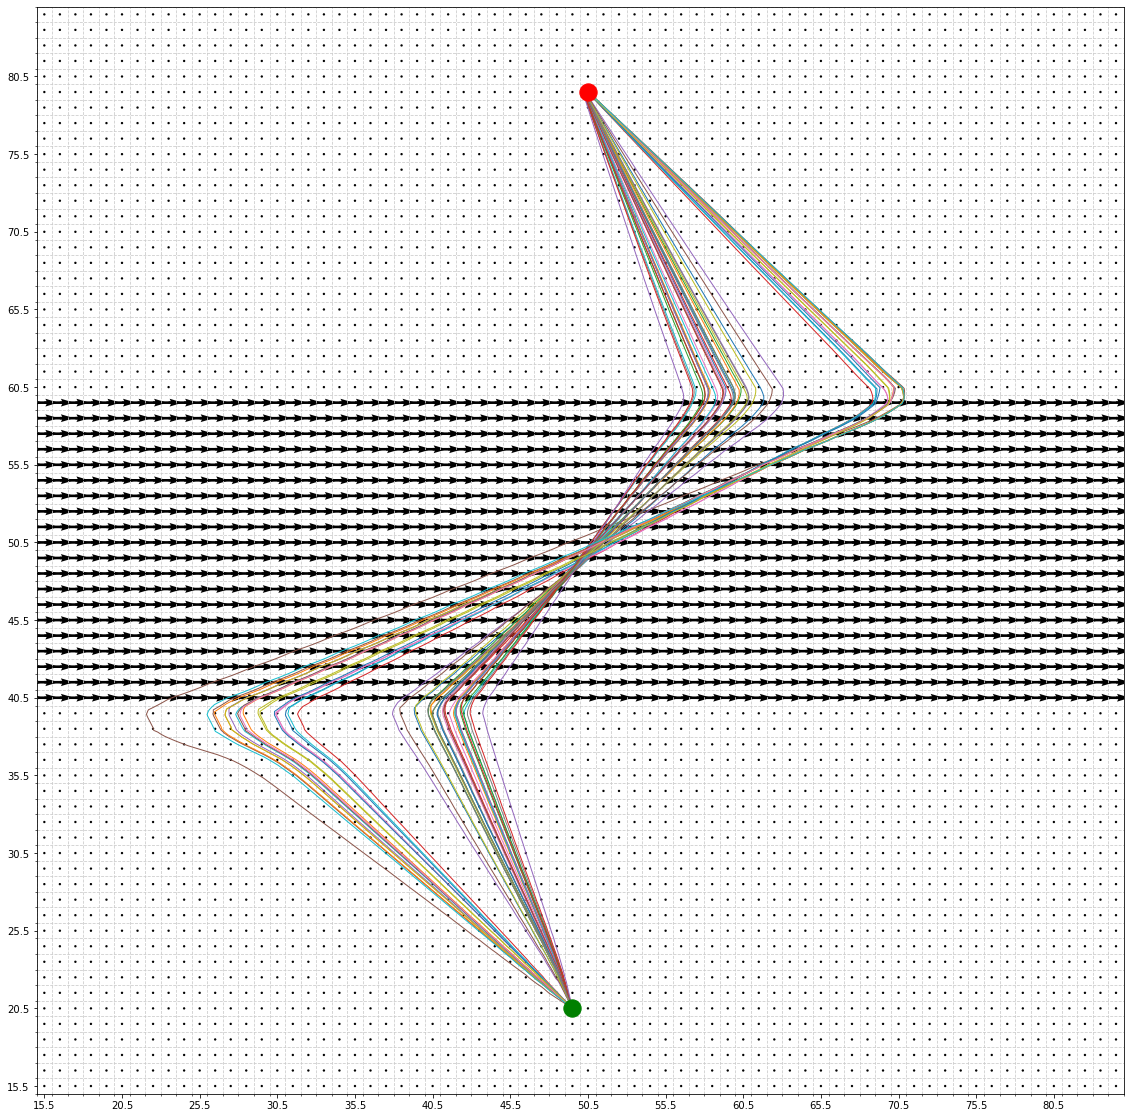

In [9]:
idx_list = np.arange(50)
plot_input_trajectory(paths, idx_list, g, X, Y, Vx_rzns, Vy_rzns)

In [ ]:
from grid_world_stationary import timeOpt_grid
from utils.custom_functions import my_meshgrid
from definition import ROOT_DIR
import scipy.io
import numpy as np
from os import getcwd
from os.path import join


def setup_grid_temp(num_actions =16, nt = 100, dt =1, F =1, startpos = (78, 48), endpos = (20, 50)):
    #Read data from files
    grid_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/param.mat'))
    path_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/pathStore.mat'))
    HW_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/HW0.mat'))
    XP = grid_mat['XP']
    YP = grid_mat['YP']
    Vx_rzns = np.load(join(ROOT_DIR,'Input_data_files/Velx_5K_rlzns.npy'))
    Vy_rzns = np.load(join(ROOT_DIR,'Input_data_files/Vely_5K_rlzns.npy'))
    num_rzns = Vx_rzns.shape[0]
    param_str = ['num_actions', 'nt', 'dt', 'F', 'startpos', 'endpos']
    params = [num_actions, nt, dt, F, startpos, endpos]

    #Set up Grid
    xs = XP[1,:]
    ys_temp = YP[:,1]
    ys = np.flip(ys_temp)
    X, Y = my_meshgrid(xs, ys)
    """ Be careful ! My Code's state indices are different from path data """
    g = timeOpt_grid(xs, ys, dt, nt, F, startpos, endpos, num_actions=num_actions)

    print("Grid Setup Complete !")
    """ CHANGE RUNNER FILE TO GET PARAMS(9TH ARG) IF YOU CHANGE ORDER OF RETURNS HERE"""
    return g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, path_mat, params, param_str, grid_mat, HW_mat

g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, path_mat, params, param_str, grid_mat, HW_mat = setup_grid_temp()

In [ ]:
HW_mat

In [ ]:
path_mat

In [ ]:
g.x

In [ ]:
grid_mat

In [ ]:
def plot_input_trajectory(paths, idx_list, g, X, Y, vStream_x, vStream_y,
                                                fname='GivenTrajectories'):
    # time calculation and state trajectory
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    # set grid
    minor_xticks = np.arange(g.xs[0] - 0.5 * g.dj, g.xs[-1] + 2 * g.dj, g.dj)
    minor_yticks = np.arange(g.ys[0] - 0.5 * g.di, g.ys[-1] + 2 * g.di, g.di)

    major_xticks = np.arange(g.xs[0], g.xs[-1] + 2 * g.dj, 5 * g.dj)
    major_yticks = np.arange(g.ys[0], g.ys[-1] + 2 * g.di, 5 * g.di)

    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(minor_yticks, minor=True)
    ax.set_xticks(major_xticks)
    ax.set_yticks(major_yticks)

    ax.set_xlim([15,85])
    ax.set_ylim([15,85])
    ax.grid(which='major', color='#CCCCCC', linestyle='', zorder = -1)
    ax.grid(which='minor', color='#CCCCCC', linestyle='--', zorder = -1)
    st_point= g.start_state
    plt.scatter(g.xs[st_point[1]], g.ys[g.ni - 1 - st_point[0]], c='g', s =300, zorder = 100)
    plt.scatter(g.xs[g.endpos[1]], g.ys[g.ni - 1 - g.endpos[0]], c='r', s = 300, zorder =100)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.quiver(X, Y, vStream_x[1, :, :], vStream_y[1, :, :])

    for idx in idx_list:
        trajectory = paths[0, idx]
    #     plt.plot(trajectory[0:-5,0], trajectory[0:-5,1], linewidth = 1, zorder= 99)
        plt.plot(trajectory[:,0], trajectory[:,1], linewidth = 1, zorder= 99)
        plt.scatter(trajectory[:,0], trajectory[:,1], s = 10, zorder= 100)

    # plt.show()
    if fname != None:
         plt.savefig(fname+str(idx), dpi=300)

    return

In [ ]:
from grid_world_stationary import timeOpt_grid
from utils.custom_functions import my_meshgrid
from definition import ROOT_DIR
import scipy.io
import numpy as np
from os import getcwd
from os.path import join


def setup_grid_temp(num_actions =16, nt = 100, dt =1, F =1, startpos = (78, 49), endpos = (19, 50)):
    #Read data from files
    grid_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/param.mat'))
    path_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/pathStore.mat'))
    HW_mat = scipy.io.loadmat(join(ROOT_DIR, 'Input_data_files/HW0.mat'))
    XP = grid_mat['XP'] - 0.5
    YP = grid_mat['YP'] - 0.5
    Vx_rzns = np.load(join(ROOT_DIR,'Input_data_files/newVelx_5K_rlzns.npy'))
    Vy_rzns = np.load(join(ROOT_DIR,'Input_data_files/newVely_5K_rlzns.npy'))
    num_rzns = Vx_rzns.shape[0]
    param_str = ['num_actions', 'nt', 'dt', 'F', 'startpos', 'endpos']
    params = [num_actions, nt, dt, F, startpos, endpos]

    #Set up Grid
    xs = XP[1,:]
    ys_temp = YP[:,1]
    ys = np.flip(ys_temp)
    X, Y = my_meshgrid(xs, ys)
    """ Be careful ! My Code's state indices are different from path data """
    g = timeOpt_grid(xs, ys, dt, nt, F, startpos, endpos, num_actions=num_actions)

    print("Grid Setup Complete !")
    """ CHANGE RUNNER FILE TO GET PARAMS(9TH ARG) IF YOU CHANGE ORDER OF RETURNS HERE"""
    return g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, path_mat, params, param_str, grid_mat, HW_mat

g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, path_mat, params, param_str, grid_mat, HW_mat = setup_grid_temp()

In [ ]:
def get_filler_coords(traj, start_pos):
    x0, y0 = start_pos
    x, y = traj[0]
    num_points = int(np.linalg.norm(traj1[0]- np.array([x0,y0]), 2)//np.linalg.norm(traj1[0]- traj1[1], 2))
    filler_xy = np.linspace((x0,y0), (x,y), int(num_points), endpoint=False)
    return filler_xy

paths= path_mat['pathStore']
paths[0,1]

In [ ]:
import math
endpos = (50,80)
# filler =get_filler_coords(paths[0,1], (50, 20))

# paths[0,1] = np.append(filler, paths[0,1], axis =0)   
l = len(paths[0,1])
print(l)
xf,yf = endpos
for i in range(l-8,l):
    x, y = paths[0,1][i]
    print(x,y)
    if x < xf and y >yf:
        print("ndex", i)
        np.delete(paths[0,1], i, axis =0)
        
    elif math.isnan(x) or math.isnan(y):
        np.delete(paths[0,1], i, axis =0)
        print("nan_ndex", i)

paths[0,1]

In [ ]:
def prune_and_pad_paths(path_ndarray, start_xy, end_xy):
    xo, yo = start_xy
    xf, yf = end_xy
    #pad
    for n in range(5000):
        pa
        